Hours	0.50  |	0.75  |	1.00  |	1.25  |	1.50  |	 1.75  |   1.75  |  2.00  | 	2.25 |	2.50 |	2.75 |	3.00 |	3.25 |	3.50 |	4.00 |	4.25 |	4.50 |	4.75 |	5.00 |	5.50 |
<br>
Pass	0 |	0 |	0 |	0 |	0 |	0 |	1 |	0 |	1 |	0 |	1 |0 |1 |	0 |	1 |	1 |	1 |	1 |	1 |	1

In general, to do: 1. Link tutorials. 2. comments, doc strings. 3. report 4. questions 

https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac <br>
https://predictiveprogrammer.com/machine-learning-from-scratch-logistic-regression/

In [1]:
import numpy as np
X = np.asarray ([[0.50], [0.75], [1.00], [1.25], [1.50], [1.75], [3.00], [4.75], [1.75], [3.25], [5.00], [2.00], [2.25], [2.50], [2.75], [3.50], [4.00], [4.25], [4.50], [5.50]]) 
y = np.asarray([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,0,1,0,1,1,1,1,1,1])

In [2]:
X_train, y_train, X_test, y_test = X[:15], y[:15], X[15:], y[15:]

## 1. Hypothesis. <br>
A function takes inputs and returns outputs. To generate probabilities, logistic regression uses a function that gives outputs between 0 and 1 for all values of X. There are many functions that meet this description, but the used in this case is the logistic function. From here we will refer to it as sigmoid.

In [3]:
len(X)

20

In [4]:
X.shape

(20, 1)

In [5]:
theta = np.zeros([1,])

In [6]:
z =np.dot(X,theta)

In [7]:
1 / (1 + np.exp(-z))

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

to do: insteads of theta,bias, do theta[0], theta[1] ?

In [8]:
# def h_lin( X, theta):
#     'X should be a data vector, theta the parameters'
#     return theta[0] + (theta[1]*X)
#1 / (1 + np.exp(-X))
def sigmoid(X,theta,bias):
    z = np.dot(X, theta) + bias
    #print(z)
    return 1 / (1 + np.exp(-z))
    #return 1 / (1+ np.exp(theta*X))


theta = np.random.rand(X.shape[1], 1)
bias = np.zeros((1,))
#theta = np.zeros(X.shape[1])
#theta = np.zeros([1,])
h = sigmoid(X,theta,bias)

In [9]:
theta

array([[0.44971673]])

In [10]:
#weights

In [11]:
h

array([[0.55597893],
       [0.58353149],
       [0.61057188],
       [0.63694892],
       [0.66252684],
       [0.68718773],
       [0.79399066],
       [0.89436786],
       [0.68718773],
       [0.81177412],
       [0.90452829],
       [0.71083306],
       [0.73338451],
       [0.75478394],
       [0.77499274],
       [0.82835431],
       [0.85801095],
       [0.87116469],
       [0.88326566],
       [0.92225891]])

## 2. Loss function <br>
Functions have parameters/weights (represented by theta in our notation) and we want to find the best values for them. To start we pick random values and we need a way to measure how well the algorithm performs using those random weights. That measure is computed using the loss function, defined as:

To do: understand loss function and fix it possibly

In [12]:
# lossValue = 0 
#     for i in range(len(y)):
#         lossValue += 0.5 * (h[i] - y[i])**2
#     return lossValue



def loss_(h, y):
#     lossValue = 0
#     for i in range(len(y)):
#         lossValue += (-y[i] * np.log(h[i]) - (1 - y[i]) * np.log(1 - h[i]))
    # entropy when true class is positive
#         pos_log = y * np.log(h + 1e-15)
#         # entropy when true class is negative
#         neg_log = (1 - y) * np.log((1 - h) + 1e-15)

#         l = -np.mean(pos_log + neg_log)
#         return l
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
#    return lossValue

In [13]:
loss_(h, y)

0.9145605310824456

## 3. Gradient descent <br>
Our goal is to minimize the loss function and the way we have to achive it is by increasing/decreasing the weights, i.e. fitting them. The question is, how do we know what parameters should be biggers and what parameters should be smallers? The answer is given by the derivative of the loss function with respect to each weight. It tells us how loss would change if we modified the parameters.

In [14]:
gradient = np.dot(X.T, (h - y)) / y.shape[0]

In [15]:
gradient

array([[ 2.27416473,  2.27416473,  2.27416473,  2.27416473,  2.27416473,
         2.27416473, -0.51333527,  2.27416473, -0.51333527,  2.27416473,
        -0.51333527,  2.27416473, -0.51333527,  2.27416473, -0.51333527,
        -0.51333527, -0.51333527, -0.51333527, -0.51333527, -0.51333527]])

In [16]:
theta

array([[0.44971673]])

To do: understand calculating gradient -> shouldn't be the same as linear reg? see

In [17]:
def LogisticRegression(X,y,alpha,treshold):
    loss_list = []

    #theta = np.zeros([X.shape[1],])
    weights = np.random.rand(X.shape[1])
    bias = np.zeros((1,))
    #theta = old_theta.copy()

   # h = sigmoid(X,theta)
    loss = loss_(sigmoid(X,weights,bias),y)
    loss_update = 0

    index = 0

    
    while(abs(loss-loss_update)> treshold):
    #while(index<50):
            
            h = sigmoid(X,weights,bias)
            
            gradient = np.dot(X.T, (h - y)) / y.shape[0]
            #print(gradient)
            weights -= alpha * gradient
            #print('theta update', theta)
            bias -= alpha * np.mean(h-y)
            
            h = sigmoid(X,weights,bias)
            
            loss = loss_update
            loss_update=loss_(h,y)
            loss_list.append(loss_update)
            #print([loss,loss_update])
            
            index+=1


    print('GD stopped at loss %s, with coefficients: %s' % (loss,[weights,bias]), 'index', index)
    return [weights,bias],loss_list
    
    
   # return (probabilities >= treshold)

In [50]:
theta, loss = LogisticRegression(X,y,0.9, 0.0001)

GD stopped at loss 0.49841135862158853, with coefficients: [array([0.9460439]), array([-2.54278989])] index 72


In [51]:
theta

[array([0.9460439]), array([-2.54278989])]

In [52]:
loss

[0.6200302375563302,
 0.6116115984783483,
 0.6034008124581948,
 0.5963678546695084,
 0.5891617719346391,
 0.5831395434698098,
 0.5767523008848265,
 0.5714791037449966,
 0.5658784267321744,
 0.5612257919764571,
 0.5564243674189758,
 0.5523533859610262,
 0.5483222828097267,
 0.5448158512414986,
 0.5414672903222744,
 0.5384857067753948,
 0.5357006969217671,
 0.5331760830024102,
 0.5308376504096367,
 0.5286914057791019,
 0.526703525991454,
 0.5248641994767084,
 0.5231555071950746,
 0.5215664236386449,
 0.5200856277747172,
 0.5187040698140419,
 0.5174135826884214,
 0.5162070189727742,
 0.5150779901136147,
 0.5140207246429714,
 0.5130299995535961,
 0.512101038559882,
 0.5112294763116284,
 0.5104113000026811,
 0.5096428216581509,
 0.5089206419252037,
 0.5082416266365513,
 0.5076028813730173,
 0.5070017316231896,
 0.5064357033102544,
 0.5059025061815797,
 0.5054000182386498,
 0.5049262719312194,
 0.5044794414549075,
 0.504057831301901,
 0.5036598657933832,
 0.5032840795751443,
 0.5029291089390

In [53]:
y_pred = sigmoid(X, theta[0],theta[1])

In [54]:
y_pred

array([0.11207013, 0.13785073, 0.1684369 , 0.20420211, 0.24532116,
       0.29168529, 0.57330339, 0.87554677, 0.29168529, 0.62991514,
       0.89911499, 0.34283134, 0.3979076 , 0.45569646, 0.51470347,
       0.68316683, 0.77580512, 0.81425467, 0.8474071 , 0.93465225])

In [55]:
for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
print (y_pred)

[0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1.]


Mean squared error: 0.20


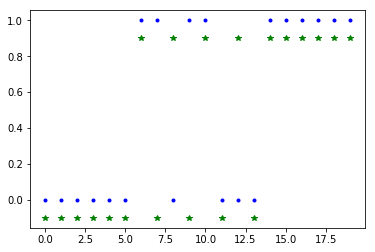

In [56]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))


plt.plot(y - 0.1,'g*')
plt.plot(y_pred,'b.')
plt.show()


plt.show()

In [57]:
y_pred

array([0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 1.])

In [58]:
y

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [59]:
(y_pred== y).mean()

0.8